# Jonathan Halverson
# Thursday, February 23, 2017
# Part 4: Winning percentage by age of UFC fights

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('halverson')
%matplotlib inline

In [22]:
iofile = 'data/fightmetric_cards/fightmetric_fights_CLEAN_3-6-2017.csv'
fights = pd.read_csv(iofile, header=0, parse_dates=['Date'])
fights.head(5)

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,Location
0,Germaine de Randamie,def.,Holly Holm,Women's Featherweight,U-DEC,NaN,5,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"
1,Anderson Silva,def.,Derek Brunson,Middleweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"
2,Jacare Souza,def.,Tim Boetsch,Middleweight,SUB,Kimura,1,3:41,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"
3,Glover Teixeira,def.,Jared Cannonier,Light Heavyweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"
4,Dustin Poirier,def.,Jim Miller,Lightweight,M-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"


In [23]:
fights.shape

(4068, 11)

In [24]:
iofile = 'data/fightmetric_fighters_with_corrections_from_UFC_Wikipedia_CLEAN.csv'
fighters = pd.read_csv(iofile, header=0, parse_dates=['Dob'])
fighters['Age'] = (pd.to_datetime('today') - fighters.Dob) / np.timedelta64(1, 'Y')
fighters.head(5)

,Name,Nickname,Dob,Weight,Height,Reach,LegReach,Stance,Win,Loss,Draw,Age
0,Tom Aaron,NaN,1978-07-13,155.0,NaN,NaN,NaN,NaN,5.0,3.0,0.0,38.653771
1,Danny Abbadi,The Assassin,1983-07-03,155.0,71.0,NaN,NaN,Orthodox,4.0,6.0,0.0,33.681732
2,David Abbott,Tank,NaT,265.0,72.0,NaN,NaN,Switch,10.0,14.0,0.0,NaN
3,Shamil Abdurakhimov,Abrek,1981-09-02,235.0,75.0,76.0,41.0,Orthodox,16.0,4.0,0.0,35.513392
4,Hiroyuki Abe,Abe Ani,NaT,145.0,66.0,NaN,NaN,Orthodox,8.0,14.0,3.0,NaN


In [25]:
cols = ['Name', 'Weight', 'Height', 'Reach', 'LegReach', 'Stance', 'Dob', 'Age']
df = fights.merge(fighters[cols], how='left', left_on='Winner', right_on='Name')
df.shape

(4068, 19)

In [26]:
df.head(3)

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,Location,Name,Weight,Height,Reach,LegReach,Stance,Dob,Age
0,Germaine de Randamie,def.,Holly Holm,Women's Featherweight,U-DEC,NaN,5,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA",Germaine de Randamie,145.0,69.0,71.0,41.0,Orthodox,1984-04-24,32.871312
1,Anderson Silva,def.,Derek Brunson,Middleweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA",Anderson Silva,185.0,74.0,77.0,42.0,Southpaw,1975-04-14,41.900929
2,Jacare Souza,def.,Tim Boetsch,Middleweight,SUB,Kimura,1,3:41,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA",Jacare Souza,185.0,73.0,72.0,41.0,Orthodox,1979-12-07,37.251963


In [27]:
df = df.merge(fighters[cols], how='left', left_on='Loser', right_on='Name', suffixes=('', '_L'))
df.shape

(4068, 27)

In [28]:
df.head(3)

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,...,Dob,Age,Name_L,Weight_L,Height_L,Reach_L,LegReach_L,Stance_L,Dob_L,Age_L
0,Germaine de Randamie,def.,Holly Holm,Women's Featherweight,U-DEC,NaN,5,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,...,1984-04-24,32.871312,Holly Holm,145.0,68.0,69.0,38.0,Southpaw,1981-10-17,35.390186
1,Anderson Silva,def.,Derek Brunson,Middleweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,...,1975-04-14,41.900929,Derek Brunson,185.0,73.0,77.0,43.0,Southpaw,1984-01-04,33.175219
2,Jacare Souza,def.,Tim Boetsch,Middleweight,SUB,Kimura,1,3:41,UFC 208: Holm vs. De Randamie,2017-02-11,...,1979-12-07,37.251963,Tim Boetsch,185.0,72.0,74.0,42.0,Orthodox,1981-01-28,36.107518


In [29]:
#df = df.drop(['Name', 'Name_L'], axis=1)

In [30]:
df[df.Dob - df.Dob_L > np.timedelta64(5, 'Y')][['Winner', 'Age', 'Loser', 'Age_L']]

,Winner,Age,Loser,Age_L
4,Dustin Poirier,28.131994,Jim Miller,33.522933
7,Islam Makhachev,25.363971,Nik Lentz,32.567404
8,Rick Glenn,27.904748,Phillipe Nover,33.093082
9,Ryan LaFlare,33.435320,Roan Carneiro,38.766025
13,Volkan Oezdemir,27.466683,Ovince Saint Preux,33.917192
14,Marcel Fortuna,31.376414,Anthony Hamilton,36.898773
15,Jessica Andrade,25.451584,Angela Hill,32.151242
21,Khalil Rountree Jr.,27.028618,Daniel Jolly,32.509908
24,Francis Ngannou,30.505760,Andrei Arlovski,38.089762
26,Sam Alvey,30.839785,Nate Marquardt,37.884419


In [31]:
wins = df[(df.Outcome == 'def.') & (df.Date > np.datetime64('2005-01-01')) & pd.notnull(df.Dob) & pd.notnull(df.Dob_L)].copy()
wins['Age'] = (wins.Date - wins.Dob) / np.timedelta64(1, 'Y')
wins['Age_L'] = (wins.Date - wins.Dob_L) / np.timedelta64(1, 'Y')

In [32]:
msk1 = wins.Age < 25
msk2 = wins.Age_L < 25
under25 = float(wins[msk1].shape[0]) / wins[msk1 | msk2].shape[0]
under25

0.6242038216560509

In [33]:
wins[msk1].shape[0], wins[msk2].shape[0]

(490, 371)

In [34]:
msk1 = (wins.Age >= 25) & (wins.Age <= 29)
msk2 = (wins.Age_L >= 25) & (wins.Age_L <= 29)
over25under30 = float(wins[msk1].shape[0]) / wins[msk1 | msk2].shape[0]
over25under30

0.6313905930470347

In [35]:
wins[msk1].shape[0], wins[msk2].shape[0]

(1235, 1118)

In [36]:
msk1 = (wins.Age >= 30) & (wins.Age <= 35)
msk2 = (wins.Age_L >= 30) & (wins.Age_L <= 35)
over30under35 = float(wins[msk1].shape[0]) / wins[msk1 | msk2].shape[0]
over30under35

0.5838264299802761

In [37]:
wins[msk1].shape[0], wins[msk2].shape[0]

(1184, 1310)

In [38]:
msk1 = wins.Age > 35
msk2 = wins.Age_L > 35
over35 = float(wins[msk1].shape[0]) / wins[msk1 | msk2].shape[0]
over35

0.47126436781609193

In [39]:
wins[msk1].shape[0], wins[msk2].shape[0]

(287, 394)

In [40]:
wins[msk1 & msk2][['Name', 'Name_L', 'Age', 'Age_L']].shape[0]

72

In [41]:
msk1 = (wins.Age > 35) & (wins.Age_L < 35)
msk2 = (wins.Age_L > 35) & (wins.Age < 35)
over35 = float(wins[msk1].shape[0]) / wins[msk1 | msk2].shape[0]
over35

0.40037243947858475

In [42]:
wins[msk1].shape[0], wins[msk2].shape[0]

(215, 322)

In [43]:
wins.Age = wins.Age.astype(int)
wins.Age_L = wins.Age_L.astype(int)
x=wins.Age.value_counts()/(wins.Age.value_counts() + wins.Age_L.value_counts())

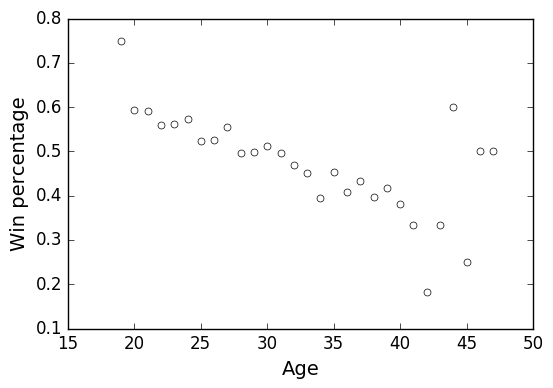

In [47]:
plt.plot(x.index, x.values, 'wo')
plt.xlabel('Age')
plt.ylabel('Win percentage')

In [45]:
wins.Age.value_counts() + wins.Age_L.value_counts()

18      NaN
19      4.0
20     27.0
21     61.0
22    152.0
23    256.0
24    360.0
25    465.0
26    571.0
27    637.0
28    680.0
29    671.0
30    650.0
31    610.0
32    517.0
33    385.0
34    332.0
35    225.0
36    184.0
37    113.0
38     58.0
39     36.0
40     21.0
41     12.0
42     11.0
43      6.0
44      5.0
45      4.0
46      4.0
47      2.0
dtype: float64

In [46]:
x

18         NaN
19    0.750000
20    0.592593
21    0.590164
22    0.559211
23    0.562500
24    0.572222
25    0.522581
26    0.525394
27    0.555730
28    0.497059
29    0.497765
30    0.512308
31    0.496721
32    0.470019
33    0.451948
34    0.394578
35    0.453333
36    0.407609
37    0.433628
38    0.396552
39    0.416667
40    0.380952
41    0.333333
42    0.181818
43    0.333333
44    0.600000
45    0.250000
46    0.500000
47    0.500000
dtype: float64